In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [27]:
pd.set_option("display.max_rows",50)

In [54]:
data=pd.read_csv("my_movies.csv")

In [55]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [56]:
data.shape

(10, 15)

In [57]:
data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


# Preprocessing

In [59]:
data=pd.get_dummies(data)

In [60]:
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# apriori algorithm

In [61]:
frequent_items=apriori(data,min_support=0.2,use_colnames=True)

In [62]:
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Sixth Sense, Gladiator, Patriot, V2_Patriot, ..."
77,0.4,"(V1_Gladiator, Sixth Sense, Gladiator, V2_Patr..."
78,0.4,"(V1_Gladiator, Sixth Sense, Patriot, V2_Patrio..."
79,0.4,"(V1_Gladiator, Gladiator, Patriot, V2_Patriot,..."


In [67]:
frequent_items1=apriori(data,min_support=0.3,use_colnames=True)
frequent_items1


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Sixth Sense, Gladiator, Patriot, V2_Patriot, ..."
59,0.4,"(V1_Gladiator, Sixth Sense, Gladiator, V2_Patr..."
60,0.4,"(V1_Gladiator, Sixth Sense, Patriot, V2_Patrio..."
61,0.4,"(V1_Gladiator, Gladiator, Patriot, V2_Patriot,..."


In [68]:
frequent_items1=apriori(data,min_support=0.5,use_colnames=True)
frequent_items1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [69]:
rules=association_rules(frequent_items,metric="lift",min_threshold=1.1)

In [70]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(V1_Gladiator, Gladiator, Patriot, V2_Patriot,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
598,(Gladiator),"(V1_Gladiator, Sixth Sense, Patriot, V2_Patrio...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
599,(Patriot),"(V1_Gladiator, Sixth Sense, Gladiator, V2_Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
600,(V2_Patriot),"(V1_Gladiator, Sixth Sense, Gladiator, Patriot...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


In [108]:
rules1=association_rules(frequent_items1,metric="lift",min_threshold=0.5)
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
...,...,...,...,...,...,...,...,...,...,...
47,"(Patriot, V2_Patriot)","(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
48,(Gladiator),"(V1_Gladiator, Patriot, V2_Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
49,(V1_Gladiator),"(Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
50,(Patriot),"(Gladiator, V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000


In [109]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(V1_Gladiator, Gladiator, Patriot, V2_Patriot,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
598,(Gladiator),"(V1_Gladiator, Sixth Sense, Patriot, V2_Patrio...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
599,(Patriot),"(V1_Gladiator, Sixth Sense, Gladiator, V2_Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
600,(V2_Patriot),"(V1_Gladiator, Sixth Sense, Gladiator, Patriot...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


In [110]:
rules.sort_values("lift",ascending=True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
77,(Sixth Sense),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
386,(Sixth Sense),"(Gladiator, V1_Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
35,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
164,"(Gladiator, Patriot, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
163,(Sixth Sense),"(Gladiator, V1_Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
36,"(Gladiator, V1_Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
177,(Sixth Sense),"(Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
41,(Sixth Sense),"(Gladiator, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
42,"(Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


In [111]:
rules.sort_values("lift",ascending=True)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
77,(Sixth Sense),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
386,(Sixth Sense),"(Gladiator, V1_Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
35,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
164,"(Gladiator, Patriot, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
163,(Sixth Sense),"(Gladiator, V1_Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
36,"(Gladiator, V1_Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
177,(Sixth Sense),"(Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
41,(Sixth Sense),"(Gladiator, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
42,"(Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


<AxesSubplot:xlabel='support', ylabel='confidence'>

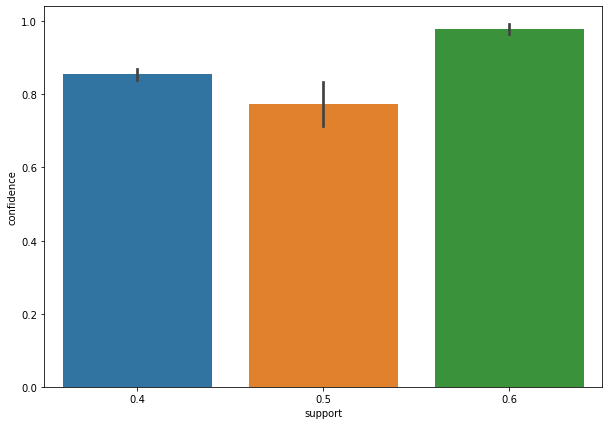

In [112]:
plt.figure(figsize=(10,7))
sns.barplot(rules["support"],rules["confidence"])

<AxesSubplot:xlabel='confidence'>

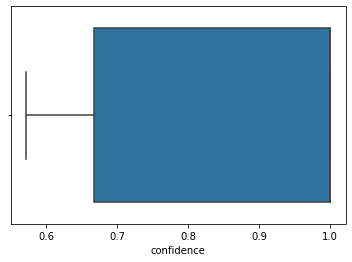

In [113]:
sns.boxplot(rules["confidence"])

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

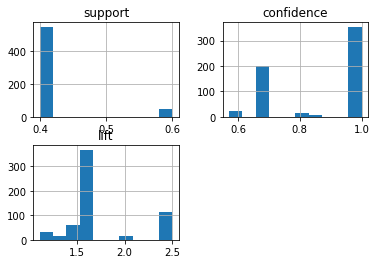

In [114]:
rules[["support","confidence","lift"]].hist()


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

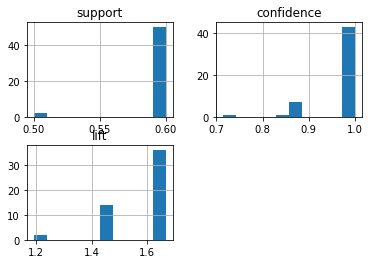

In [115]:
rules1[["support","confidence","lift"]].hist()

<AxesSubplot:xlabel='support', ylabel='confidence'>

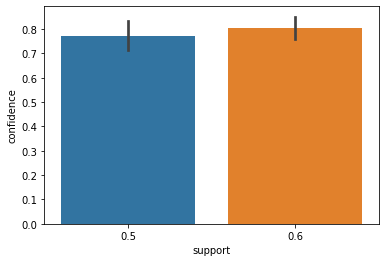

In [116]:
sns.barplot(rules1["support"],rules["confidence"])